In [256]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [257]:
mtasubwayfile = "../New-York-Transportation/Raw Data/MTA_Subway.csv"
sub_data = pd.read_csv(mtasubwayfile)
sub_data = sub_data[84:111]
#sub_data

In [258]:
mtabusfile = "../New-York-Transportation/Raw Data/MTA_Bus 08-Apr_17.csv"
bus_data = pd.read_csv(mtabusfile)
bus_data = bus_data[:28]
#bus_data

In [259]:
mtatollfile = "../New-York-Transportation/Raw Data/MTA_Toll.csv"
toll_data = pd.read_csv(mtatollfile)
toll_data = toll_data[84:111]
#toll_data

In [260]:
mtacommfile_north = "../New-York-Transportation/Raw Data/MTA_Coummuter_Train_North.csv"
comm_north_data = pd.read_csv(mtacommfile_north)
comm_north_data = comm_north_data[84:112]
#comm_north_data

In [261]:
mtacommfile_long = "../New-York-Transportation/Raw Data/MTA_Commuter_Train_Long_Island.csv"
comm_long_data = pd.read_csv(mtacommfile_long)
comm_long_data = comm_long_data[84:112]
#comm_long_data

In [262]:
proj_data = sub_data
proj_data = proj_data.append(bus_data).append(toll_data).append(comm_north_data).append(comm_long_data)
#proj_data

In [263]:
proj_data = proj_data.reset_index(drop=True).drop(
    ['PARENT_SEQ', 'INDICATOR_SEQ', 'DESCRIPTION', 'INDICATOR_UNIT', 'DESIRED_CHANGE',
     'DECIMAL_PLACES', 'FREQUENCY', 'YTD_TARGET', 'MONTHLY_TARGET','CATEGORY', 'INDICATOR_NAME'],
    axis=1)
proj_data

,AGENCY_NAME,PERIOD_YEAR,PERIOD_MONTH,YTD_ACTUAL,MONTHLY_ACTUAL
0,NYC Transit,2015.0,1.0,1.337699e+08,133769924.0
1,NYC Transit,2015.0,2.0,2.645482e+08,130778251.0
2,NYC Transit,2015.0,3.0,4.176251e+08,153076928.0
3,NYC Transit,2015.0,4.0,5.679733e+08,150348150.0
4,NYC Transit,2015.0,5.0,7.193922e+08,151418931.0
5,NYC Transit,2015.0,6.0,8.714265e+08,152034275.0
6,NYC Transit,2015.0,7.0,1.019525e+09,148098272.0
7,NYC Transit,2015.0,8.0,1.159499e+09,139974023.0
8,NYC Transit,2015.0,9.0,1.306014e+09,146515000.0
9,NYC Transit,2015.0,10.0,1.467138e+09,161124042.0


In [246]:
yearly_transit_data = proj_data_all.groupby(proj_data_all['PERIOD_YEAR']).sum().drop(
    ['PERIOD_MONTH'], axis=1).reset_index(drop=False)
yearly_transit_data

,PERIOD_YEAR,YTD_ACTUAL,MONTHLY_ACTUAL
0,2015.0,1.508270e+10,2.358899e+09
1,2016.0,1.524631e+10,2.365547e+09
2,2017.0,1.151823e+09,5.731450e+08


In [319]:
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data_15 = proj_data_all[proj_data_all['PERIOD_YEAR']==2015]
data_16 = proj_data_all[proj_data_all['PERIOD_YEAR']==2016]
data_17 = proj_data_all[proj_data_all['PERIOD_YEAR']==2017]
data_multi_year = data_15.append(data_16).append(data_17)
data_multi_year['PERIOD_YEAR'] = data_multi_year['PERIOD_YEAR'].astype('int64', copy=False)

In [248]:
data_multi_year["PLOT_DATE"] = data_multi_year['PERIOD_YEAR'].map(str) + data_multi_year['PERIOD_MONTH'].map(str)

In [301]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#people = data_multi_year['MONTHLY_ACTUAL']
people_sub = data_multi_year[data_multi_year['AGENCY_NAME']=='NYC Transit']
people_sub['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']
#people_sub.set_index(people_sub['PLOT_LABELS'], drop=False)

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [322]:
people_bus = data_multi_year[data_multi_year['AGENCY_NAME']=='MTA Bus']

people_bus['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17']
people_bus = people_bus.drop(people_bus['Apr-17'])

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


KeyError: 'Apr-17'

In [307]:
people_long = data_multi_year[data_multi_year['AGENCY_NAME']=='Long Island Rail Road']
people_long['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [309]:
people_north = data_multi_year[data_multi_year['AGENCY_NAME']=='Metro-North Railroad']
people_north['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [310]:
people_toll = data_multi_year[data_multi_year['AGENCY_NAME']=='Bridges and Tunnels']
people_toll['PLOT_LABELS'] = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15',
                             'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16',
                             'Jan-17', 'Feb-17', 'Mar-17']

/Users/Wesson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


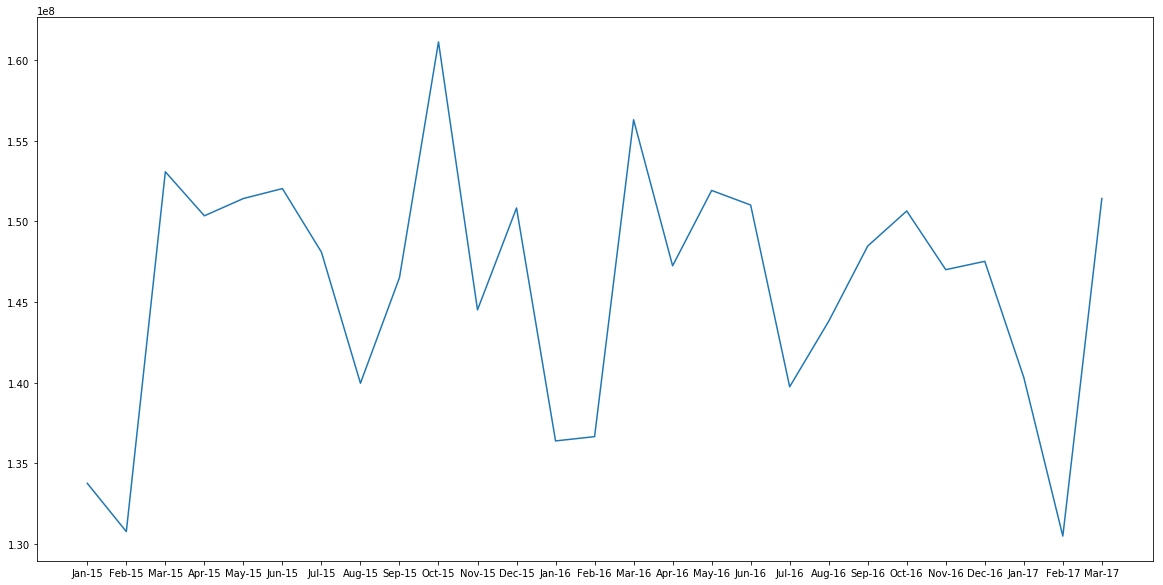

In [312]:
plt.figure(figsize=(20,10))
plt.plot(people_sub['PLOT_LABELS'], people_sub['MONTHLY_ACTUAL'])

ValueError: x and y must have same first dimension, but have shapes (28,) and (27,)

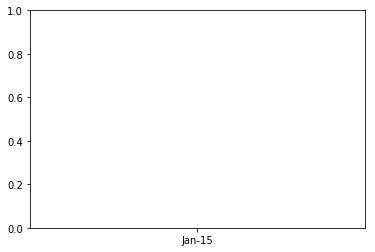

In [313]:
plt.plot(people_bus['PLOT_LABELS'], people_sub['MONTHLY_ACTUAL'])

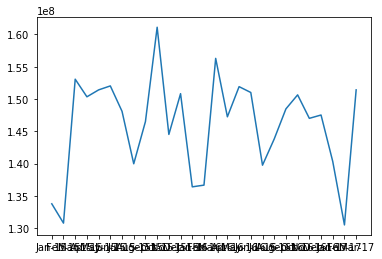

In [314]:
plt.plot(people_long['PLOT_LABELS'], people_sub['MONTHLY_ACTUAL'])

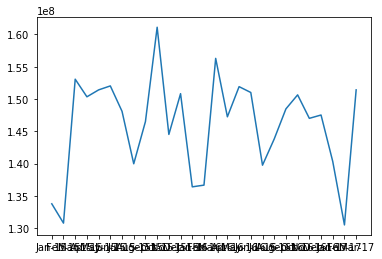

In [315]:
plt.plot(people_north['PLOT_LABELS'], people_sub['MONTHLY_ACTUAL'])

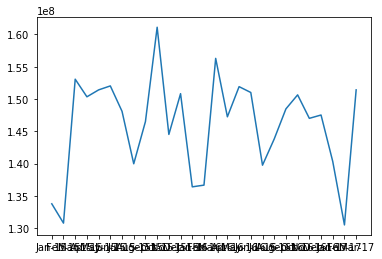

In [316]:
plt.plot(people_toll['PLOT_LABELS'], people_sub['MONTHLY_ACTUAL'])#, labels=people_sub['PLOT_LABELS']) 
#plt.plot(x_axis, people_bus); plt.plot(x_axis, people_long); 
#plt.plot(x_axis, people_north); plt.plot(x_axis, people_toll)
#plt.legend(['Subway', 'MTA Bus', 'Long Island Rail Road',
            #'Metro-North Railroad', 'Bridges and Tunnels'])